In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [19]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [21]:
# Reshape to include channel dimension (CNN expects shape: [samples, height, width, channels])
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [22]:
# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [23]:
# Check data shapes
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

X_train shape: (60000, 28, 28, 1)
y_train_encoded shape: (60000, 10)


In [24]:
# Build a CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

c:\Users\hp\anaconda3\envs\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(X_train, y_train_encoded,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7882 - loss: 0.6676 - val_accuracy: 0.9787 - val_loss: 0.0700
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.9651 - loss: 0.1154 - val_accuracy: 0.9850 - val_loss: 0.0506
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.9803 - loss: 0.0654 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9831 - loss: 0.0542 - val_accuracy: 0.9907 - val_loss: 0.0335
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9913 - val_loss: 0.0344
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9913 - val_loss: 0.0326
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9886 - loss: 0.0374 - 

In [27]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0313

Test Accuracy: 99.17%


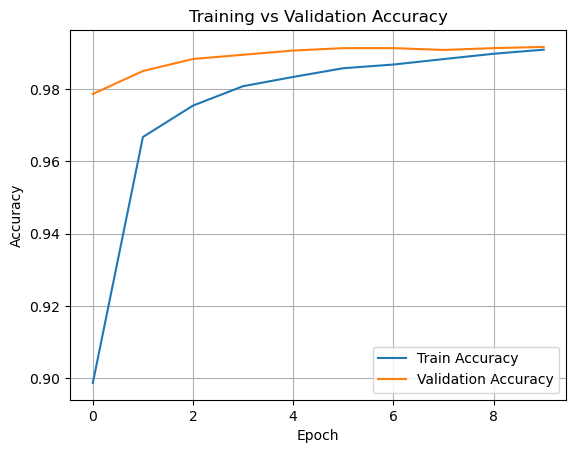

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [30]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

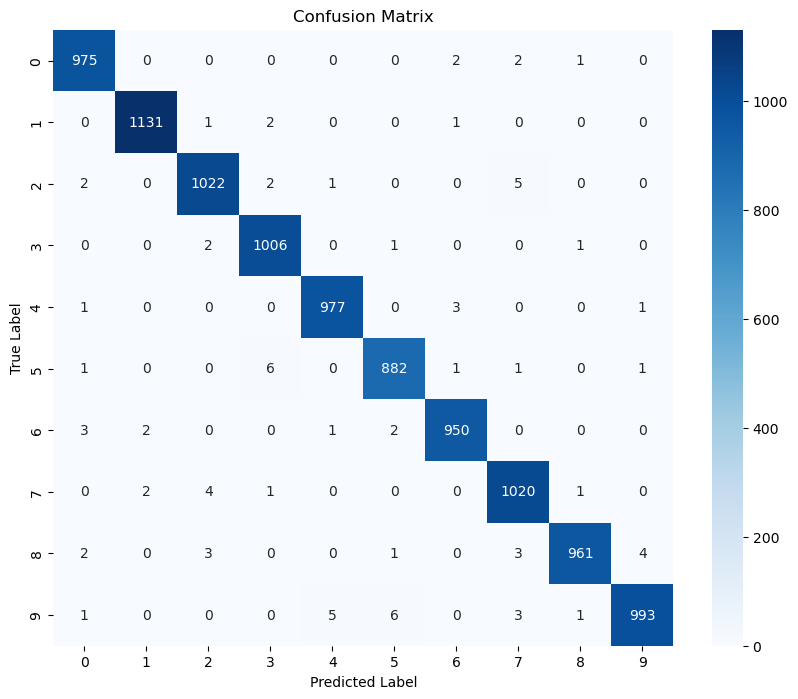

In [32]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
# Select some random images from the test set
num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]

In [34]:
# Predict using the trained model
predicted_probs = model.predict(sample_images)
predicted_classes = np.argmax(predicted_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


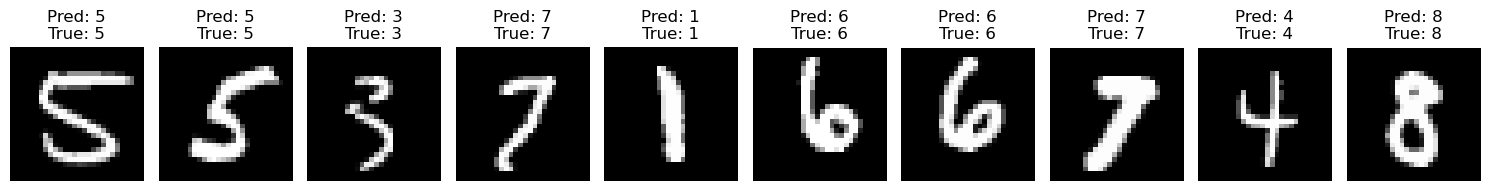

In [35]:
# Plot the images with predicted and true labels
plt.figure(figsize=(15, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
